# LETS LAY HANDS ON EDA

In [32]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv("C:/Users/HP/Downloads/archive/marketing_analysis.csv"
                  ,skiprows = 2)

# Printing the data
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


The dataset we'll be using today from a reliable repository on GitHub. It is a  dataset of customers of a certain bank showing various info of more than 45k customers. Using the info() function, we can see all the information about our dataset

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      45161 non-null  int64  
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

Now if we observe the above dataset, the customerid column has of no importance to our analysis, and also the jobedu column has both the information of job and education in it.

So, what we’ll do is, we’ll drop the customerid column and we’ll split the jobedu column into two other columns job and education and after that, we’ll drop the jobedu column as well.

In [33]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.

There are mainly three types of missing values.

1. MCAR(Missing completely at random): These values do not depend on any other features.
2. MAR(Missing at random): These values may be dependent on some other features.
3. MNAR(Missing not at random): These missing values have some reason for why they are missing.
Let’s see which columns have missing values in the dataset.

In [34]:
# Checking the missing values
#data.isnull().any()
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

As we can see three columns contain missing values. Let’s see how to handle the missing values. We can handle missing values by dropping the missing records or by imputing the values.

##### Drop the missing Values

Let’s handle missing values in the age column.

In [38]:
# Dropping the records with age missing in data dataframe. We're doing this by creating a copy of the data without null values
data = data[~data.age.isnull()].copy()

# Checking the missing values in the dataset.
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

##### Replace missing value with the Mode

Let’s impute values to the missing values for the month column.

Since the month column is of an object type, let’s calculate the mode of that column and impute those values to the missing values.

In [43]:
# Find the mode of month in data
month_mode = data.month.mode()[0]
#month_mode

# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
data.month.isnull().sum()

0

Handling the missing values in the Response column. Since, our target column is Response Column, if we impute the values to this column it’ll affect our analysis. So, it is better to drop the missing values from Response Column.

In [44]:
#drop the records with response missing in data.
data = data[~data.response.isnull()].copy()
# Calculate the missing values in each column of data frame
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Now, that we are clear on how to source and clean the data, let’s see how we can analyze the data.

### Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

#### Categorical Unordered Univariate Analysis:

An unordered variable is a categorical variable that has no defined order. If we take our data as an example, the job column in the dataset is divided into many sub-categories like technician, blue-collar, services, management, etc. There is no weight or measure given to any value in the ‘job’ column.

Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.

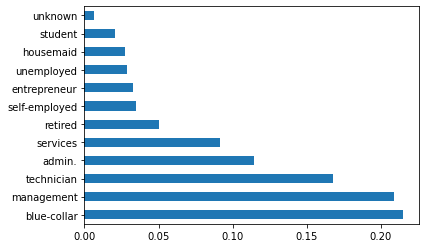

In [50]:
# Let's calculate the percentage of each job status category.
job_count = data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
job_count.plot.barh()
plt.show()

By the above bar plot, we can infer that the data set contains more number of blue-collar workers compared to other categories.

#### Categorical Ordered Univariate Analysis:

Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:

Month: Jan, Feb, March……
Education: Primary, Secondary,……
Now, let’s analyze the Education Variable from the dataset. Since we’ve already seen a bar plot, let’s see how a Pie Chart looks like.

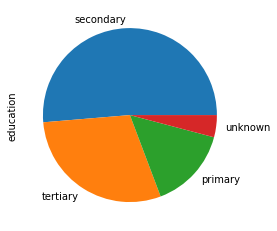

In [61]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

Other Univariate analysis we can do is to see how the people in our dataset earn. We can do this to visualize the earning class of the customers. Although a Pie Chart or bar chart should normally be used for this type of visualization, let us use a histogram since we haven't seen it before.

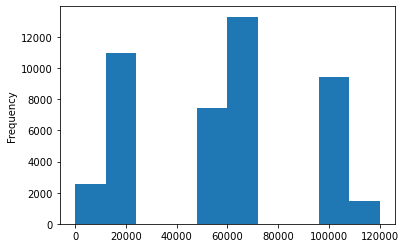

In [76]:
#plot the histogram of salary categories
data['salary'].plot.hist()
plt.show()

This is how we analyze univariate categorical analysis. If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. We can get those values by using the describe function.

In [62]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

### Bivariate Analysis

If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

1. Numeric-Numeric Analysis:

Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in different ways. In this lesson, we would be doing so using a Scatter Plot and a Correlation Matrix

##### Scatter Plot

Let’s take three columns ‘Balance’, ‘Age’ and ‘Salary’ from our dataset and see what we can infer by plotting to scatter plot between salary balance and age balance

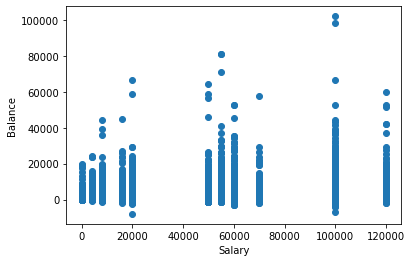

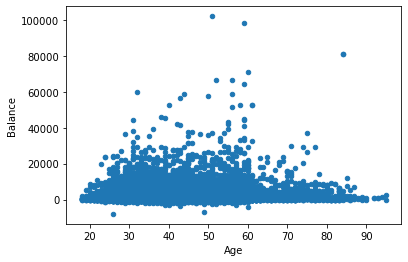

In [81]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.xlabel('Salary') 
plt.ylabel('Balance')
plt.show()

#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

##### Correlation Matrix

Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

In [94]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


First, we created a matrix using age, salary, and balance. After that, we are plotting the heatmap using the seaborn library of the matrix which is shown below

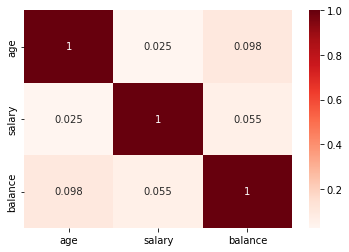

In [95]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

2. Numeric - Categorical Analysis

Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.

Let’s take salary and response columns from our dataset.

First check for mean value using groupby

In [82]:
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

There is not much of a difference between the yes and no response based on the salary.

Let’s calculate the median,

In [83]:
#groupby the response to find the median of the salary with response no & yes separately.
data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

By both mean and median we can say that the response of yes and no remains the same irrespective of the person’s salary. But, is it truly behaving like that, let’s plot the box plot for them and check the behavior.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


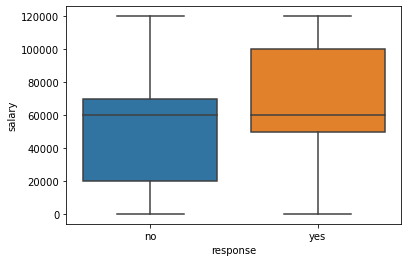

In [85]:
#plot the box plot of salary for yes & no responses.
x = data.response
y = data.salary
sns.boxplot(x, y)
plt.show()

As we can see, when we plot the Box Plot, it paints a very different picture compared to mean and median. The IQR for customers who gave a positive response is on the higher salary side.

This is how we analyze Numeric-Categorical variables, we use mean, median, and Box Plots to draw some sort of conclusions.

3. Categorical — Categorical Analysis

Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.

In [86]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

Let’s see how the response rate varies for different categories in marital status.

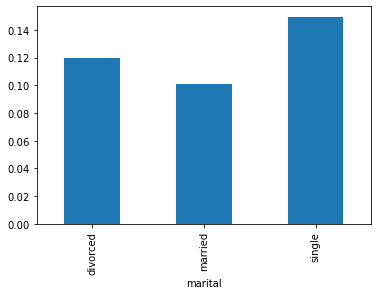

In [87]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

By the above graph, we can infer that the positive response is more for Single status members in the data set. Similarly, we can plot the graphs for Loan vs Response rate, Housing Loans vs Response rate, etc.

# VISUALIZATION CASE STUDY

In [97]:
df = pd.read_csv("C:/Users/HP/Downloads/archive/netflix_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [98]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.dropna(inplace = True)
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [8]:
df.type.value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

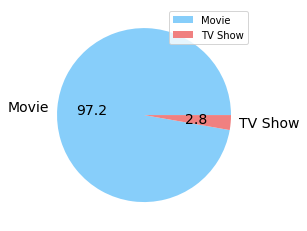

In [89]:
#plt.figure(figsize=(10, 8))
x = df.type.value_counts()
y = df.type.value_counts().index
plt.pie(x, labels = y, autopct="%.1f",textprops={'fontsize': 14},colors=['lightskyblue', 'lightcoral'])
plt.legend()
plt.show()

In [10]:
Top_15_Country= df.country.value_counts().head(10)
Top_15_Country = pd.DataFrame(Top_15_Country)
Top_15_Country

,country
United States,1846
India,875
United Kingdom,183
Canada,107
Spain,91
Egypt,90
Nigeria,88
Japan,83
Turkey,79
Indonesia,76


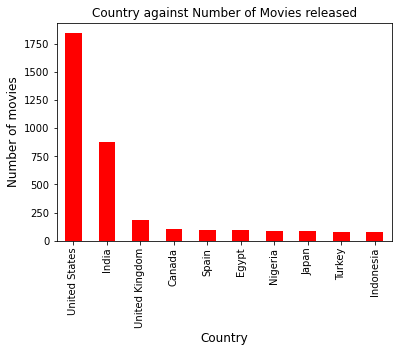

In [92]:
x = Top_15_Country.index
y = Top_15_Country.country

#plt.figure(figsize=(12, 8))
#plt.bar(x,y, color = "red")
y.plot.bar(x, color = "red")
#plt.barh(a,b, color = "red", height = 0.1)
#y.plot.barh(x,color = "red")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Number of movies", fontsize = 12)
plt.title("Country against Number of Movies released")
plt.show()

In [12]:
new_categories = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
df["rating"] = df['rating'].replace(new_categories)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,Mature Audience,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,Teens,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,Teens,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,Mature Audience,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,Teens,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [13]:
rating = df.rating.value_counts()
rating_table = pd.DataFrame(rating)
rating_table

,rating
Mature Audience,2663
Teens,2038
Parental Guidance,431
General Audience,200


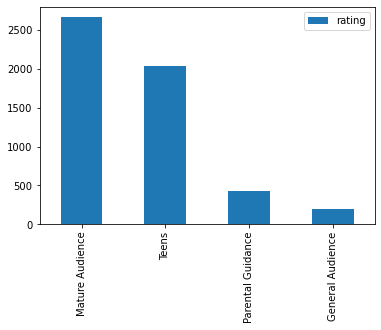

In [91]:
rating_table.plot.bar()
plt.show()